In [4]:
# Import Libraries
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt
import scipy


In [6]:

def load_graph_from_processed_data(processed_data_folder):
    """
    Load processed data (nodes and edges) into a NetworkX graph.
    """
    G = nx.Graph()

    for file in os.listdir(processed_data_folder):
        if file.endswith("_edges.csv"):
            edges_file = os.path.join(processed_data_folder, file)
            try:
                edges_df = pd.read_csv(edges_file)

                # Identify correct column names
                column_pairs = [
                    ("authors", "source_domain"),
                    ("Alleged deployer of AI system", "Alleged developer of AI system"),
                    ("Known AI Goal", "Known AI Technology"),
                    ("duplicate_incident_number", "true_incident_number")
                ]
                
                source_col, target_col = None, None
                for col1, col2 in column_pairs:
                    if col1 in edges_df.columns and col2 in edges_df.columns:
                        source_col, target_col = col1, col2
                        break
                
                if not source_col or not target_col:
                    print(f"Skipping file '{file}': No matching column structure.")
                    continue

                # Add edges while preventing duplicates
                seen_edges = set()
                for _, row in edges_df.iterrows():
                    source = row[source_col]
                    target = row[target_col]
                    weight = row.get("weight", 1)

                    if (source, target) not in seen_edges:
                        G.add_edge(source, target, weight=weight)
                        seen_edges.add((source, target))

            except Exception as e:
                print(f"Error processing file '{file}': {e}")
                continue

    return G

In [8]:
# Path to the processed data folder
processed_data_folder = "/Users/sylvesterduah/Documents/Code/De_Alignment/data/processed/"

# Load the graph
G = load_graph_from_processed_data(processed_data_folder)

# Print basic graph information
print("Graph Info:")
print(G)

Graph Info:
Graph with 5730 nodes and 4398 edges


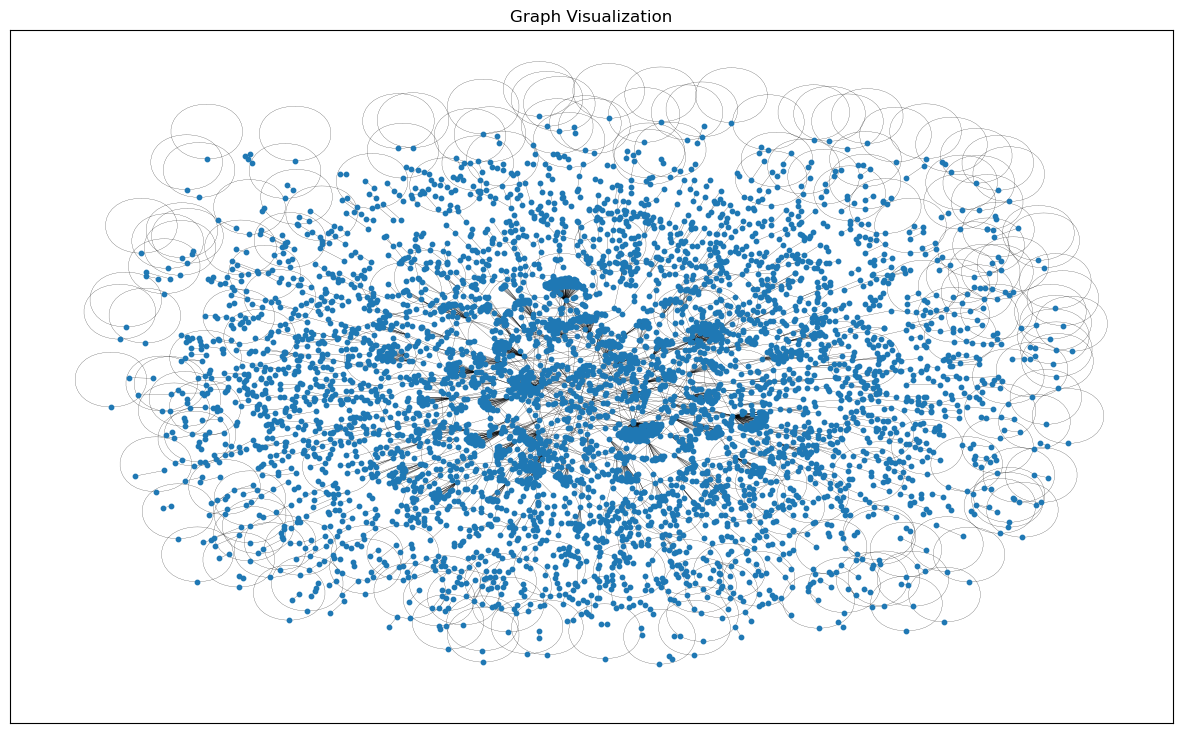

Graph saved to 'graph.graphml'.


In [10]:
# Visualize the graph
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)
plt.title("Graph Visualization")
plt.show()

# Save the graph
nx.write_graphml(G, "graph.graphml")
print("Graph saved to 'graph.graphml'.")